___


# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [70]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


** Check out the info(), head(), and describe() methods on loans.**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [72]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

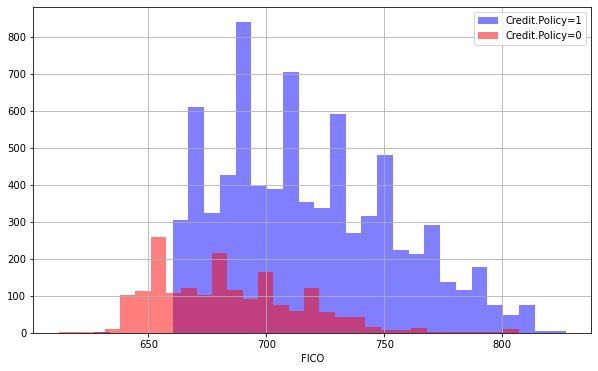

In [73]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                       bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

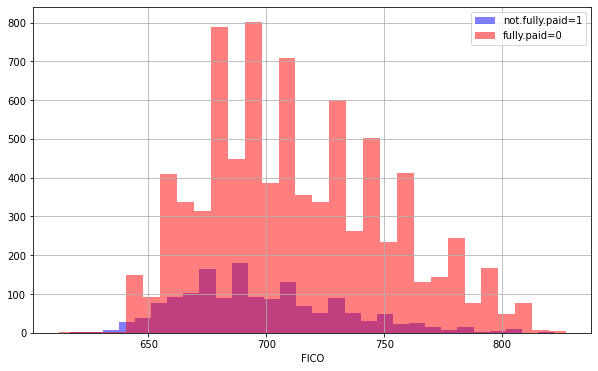

In [74]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                       bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                        bins=30,label='fully.paid=0')
plt.legend()
plt.xlabel('FICO')


** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

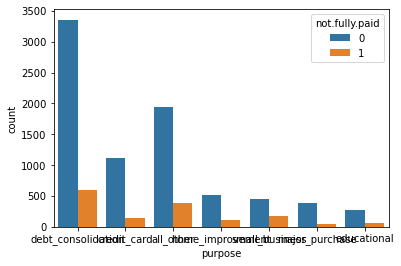

In [75]:
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

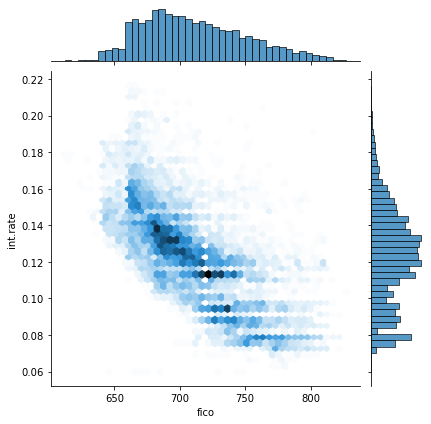

In [76]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='hex')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

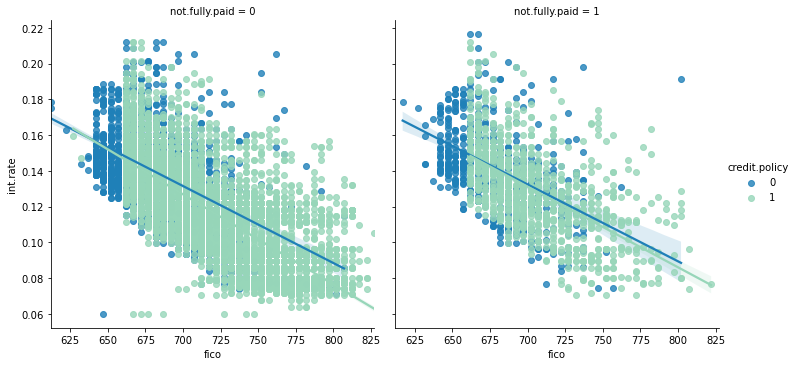

In [77]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='YlGnBu_r')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [79]:
## Our cat feature is ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [80]:
final_data = pd.get_dummies(df['purpose'],drop_first=True)

In [81]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   credit_card         9578 non-null   uint8
 1   debt_consolidation  9578 non-null   uint8
 2   educational         9578 non-null   uint8
 3   home_improvement    9578 non-null   uint8
 4   major_purchase      9578 non-null   uint8
 5   small_business      9578 non-null   uint8
dtypes: uint8(6)
memory usage: 56.2 KB


##  Defining X and y values

In [82]:
df_concat = pd.concat([df,final_data],axis=1)
df_concat

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Removing  unwanted columns

In [85]:
df_concat.drop(['purpose'],inplace=True,axis=1)
df_concat

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Defining X and y values

In [89]:
X = df_concat.drop('not.fully.paid',axis=1)

y = df['not.fully.paid']
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [90]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [92]:
X_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
6010,1,0.1114,278.83,10.257659,24.63,727,8010.000000,9193,28.50,0,0,0,0,1,0,0,0,0
4381,1,0.1461,51.72,10.778956,7.25,667,3780.000000,3820,93.20,2,1,0,0,1,0,0,0,0
9246,0,0.1739,215.09,12.220981,3.04,687,3479.958333,2474,31.70,9,0,0,0,0,0,0,0,0
5821,1,0.1183,66.27,10.959540,17.16,692,2070.000000,10708,79.90,0,0,0,1,0,0,0,0,0
491,1,0.0976,225.09,10.225571,17.78,717,1830.000000,16326,48.60,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,0,0.1253,167.34,11.877569,8.50,702,3780.041667,172842,69.14,2,1,0,0,0,0,0,0,0
6538,1,0.1148,692.34,12.100712,1.98,792,4203.041667,682,3.30,1,0,0,0,0,0,1,0,0
2151,1,0.1505,277.53,10.621327,10.62,682,3270.000000,6933,82.50,1,0,0,0,0,0,0,0,1
6337,1,0.1287,269.07,11.820410,16.59,687,4140.041667,43312,79.90,0,0,0,0,1,0,0,0,0


In [93]:
X_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
4478,1,0.0859,126.45,10.085809,21.85,737,2250.000000,1733,10.9,1,0,0,0,1,0,0,0,0
7014,1,0.1357,84.93,10.558414,13.50,677,3720.000000,2542,29.9,2,0,0,0,1,0,0,0,0
7811,0,0.1565,131.19,8.892886,17.31,642,3478.958333,0,69.5,1,0,0,0,0,0,0,0,0
4657,1,0.1253,401.60,11.856515,5.59,702,5009.958333,4381,16.5,2,0,0,1,0,0,0,0,0
4003,1,0.1095,314.06,11.944760,8.75,732,3119.958333,33147,34.9,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,0.1039,194.71,10.588703,13.88,702,2730.000000,7198,65.4,1,0,0,1,0,0,0,0,0
7930,0,0.1154,164.98,10.621327,10.36,672,6839.958333,15301,46.8,7,1,0,0,0,0,0,0,0
2271,1,0.1537,522.70,11.695247,12.72,687,3210.041667,23997,36.9,1,1,0,0,1,0,0,0,0
4833,1,0.1635,706.59,10.985293,2.87,762,2580.000000,11341,32.2,1,0,0,0,0,0,0,0,1


In [94]:
y_train

6010    0
4381    0
9246    1
5821    0
491     0
       ..
9424    0
6538    0
2151    0
6337    0
5291    0
Name: not.fully.paid, Length: 6704, dtype: int64

In [95]:
y_test

4478    0
7014    0
7811    1
4657    0
4003    0
       ..
827     0
7930    0
2271    0
4833    0
6403    0
Name: not.fully.paid, Length: 2874, dtype: int64

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [96]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [97]:
classifier_DTree = DecisionTreeClassifier()
classifier_DTree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [99]:
predict_DTree = classifier_DTree.predict(X_test)
predict_DTree

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Creating Confusion and Classification Report

In [102]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predict_DTree,y_test))
print('\n')
print(classification_report(predict_DTree,y_test))

[[2019  381]
 [ 362  112]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2400
           1       0.23      0.24      0.23       474

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier_RForest = RandomForestClassifier(n_estimators=100)
classifier_RForest.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [108]:
predict_RForest = classifier_RForest.predict(X_test)
predict_RForest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [110]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(predict_RForest,y_test))

print('\n')

print(classification_report(predict_RForest,y_test))

[[2367  482]
 [  14   11]]


              precision    recall  f1-score   support

           0       0.99      0.83      0.91      2849
           1       0.02      0.44      0.04        25

    accuracy                           0.83      2874
   macro avg       0.51      0.64      0.47      2874
weighted avg       0.99      0.83      0.90      2874



**What performed better the random forest or the decision tree?**

## *Decision Tree*

In [ ]:
! git add Decision_Trees_and_Random_Forest_Project.ipynb loan_data.csv
! git commit -m "12:13/12-06-2021"
! git push origin main